In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price-dataset/laptop_data.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
data=pd.read_csv('/kaggle/input/laptop-price-dataset/laptop_data.csv')

In [5]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
data.shape

(1303, 12)

we have many categorical variable we need to convert it into numerical, and columns we don't need it


In [8]:
data=data.drop(columns='Unnamed: 0')

first we drop un wanted column

In [9]:
data.shape

(1303, 11)

In [10]:
data['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

i think some visualzation will help in data more and more

<Axes: xlabel='Company', ylabel='count'>

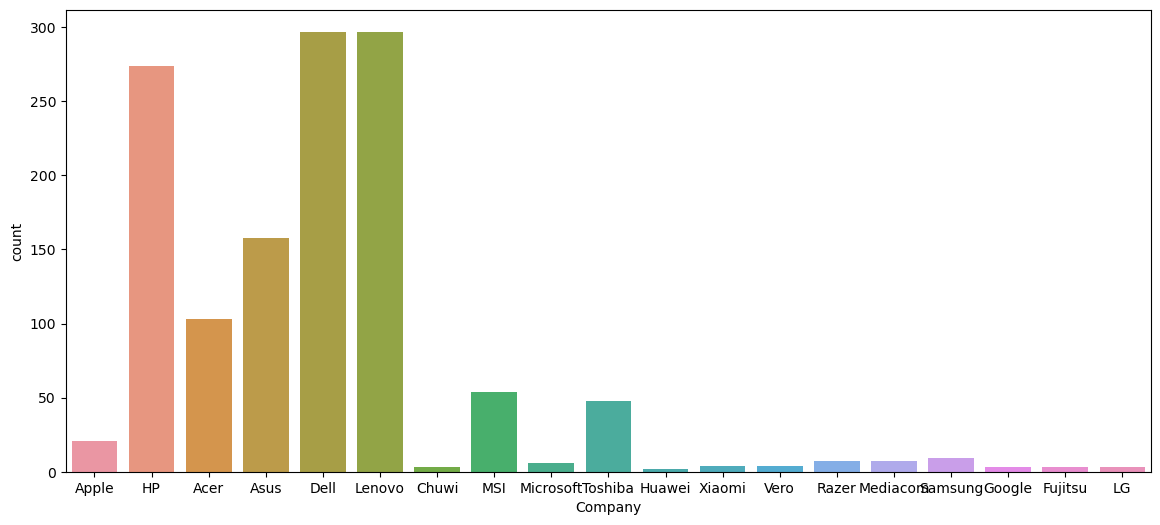

In [11]:
plt.figure(figsize=(14,6))
sns.countplot(data=data,x='Company')

In [12]:

#data=data['Company'].value_counts()>20
# Get the values with count less than 20
value_counts = data['Company'].value_counts()
values_to_remove = value_counts[value_counts < 20].index.tolist()

# Remove the rows with those values
data = data[~data['Company'].isin(values_to_remove)]

In [13]:
data.shape

(1252, 11)

In [14]:
values_to_remove

['Samsung',
 'Razer',
 'Mediacom',
 'Microsoft',
 'Xiaomi',
 'Vero',
 'Chuwi',
 'Google',
 'Fujitsu',
 'LG',
 'Huawei']

thise companies is less than 20 device i think it's not important

In [15]:
data['Company'].value_counts()

Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
Toshiba     48
Apple       21
Name: Company, dtype: int64

In [16]:
data.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
406,Toshiba,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.2kg,93080.16


<Axes: >

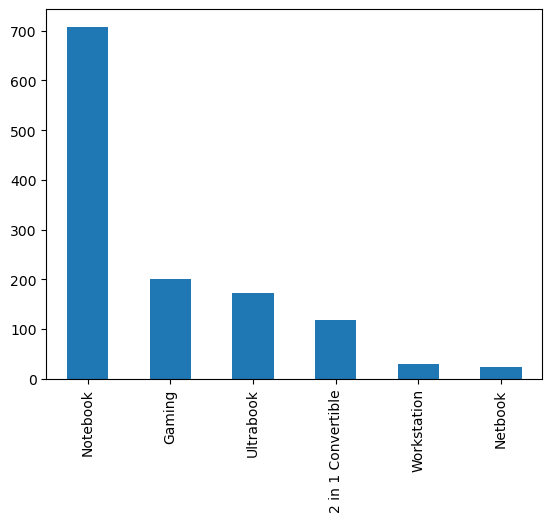

In [17]:
data['TypeName'].value_counts().plot(kind='bar')

In [18]:
data['Inches'].nunique()

15

In [19]:
data['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 11.6, 17.3, 10.1, 12.5, 18.4, 13.9,
       17. , 14.1, 11.3, 15. ])

<Axes: xlabel='Inches', ylabel='count'>

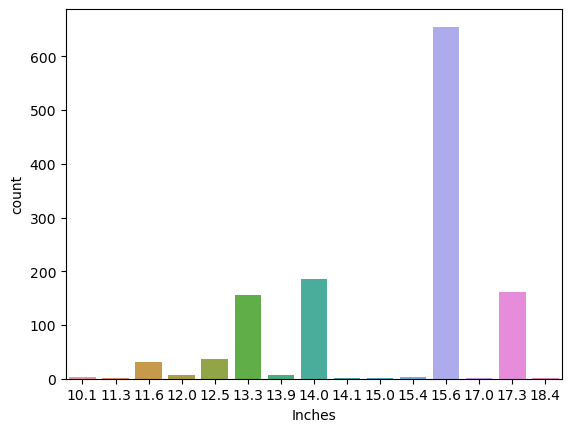

In [20]:
sns.countplot(data=data,x='Inches')

In [21]:
data['Inches'].value_counts()

15.6    655
14.0    186
17.3    162
13.3    156
12.5     37
11.6     31
12.0      6
13.9      6
15.4      4
10.1      4
18.4      1
17.0      1
14.1      1
11.3      1
15.0      1
Name: Inches, dtype: int64

In [22]:
I_count=data['Inches'].value_counts()
value_toremove=I_count[I_count<30].index.tolist()

data = data[~data['Inches'].isin(value_toremove)]

In [23]:
data.shape

(1227, 11)

In [24]:
data['ScreenResolution'].value_counts()

Full HD 1920x1080                                493
1366x768                                         275
IPS Panel Full HD 1920x1080                      221
IPS Panel Full HD / Touchscreen 1920x1080         45
Full HD / Touchscreen 1920x1080                   44
1600x900                                          22
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      8
4K Ultra HD / Touchscreen 3840x2160                8
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Touchscreen 2560x1440                    5
1440x900                                           4
IPS Panel 2560x1440                           

In [25]:
data['Cpu'].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i5 3.1GHz',
       'AMD A9-Series 9420 3GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i3 7100U 2.4GHz',
       'Intel Atom x5-Z8350 1.44GHz', 'Intel Core i5 7300HQ 2.5GHz',
       'AMD E-Series E2-9000e 1.5GHz', 'Intel Core i5 1.6GHz',
       'Intel Core i7 8650U 1.9GHz', 'AMD E-Series E2-6110 1.5GHz',
       'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Celeron Dual Core N3060 1.6GHz', 'AMD FX 9830P 3GHz',
       'Intel Core i7 7560U 2.4GHz', 'AMD E-Series 6110 1.5GHz',
       'Intel Core i5 6200U 2.3GHz', 'Intel Core M 6Y75 1.2GHz',
       'Intel Core i5 7500U 2.7GHz', '

In [26]:
data['Cpu'].nunique()

100

In [27]:
data['cpu_name'] = data['Cpu'].apply(lambda x : " ".join(x.split()[0:3]))


In [28]:
data['cpu_name'].value_counts()

Intel Core i7               495
Intel Core i5               409
Intel Core i3               135
Intel Celeron Dual           75
Intel Pentium Quad           27
Intel Core M                 12
AMD A9-Series 9420           11
AMD A6-Series 9220            8
AMD A12-Series 9720P          7
Intel Celeron Quad            5
AMD A8-Series 7410            4
Intel Pentium Dual            3
AMD A9-Series 9410            3
AMD Ryzen 1700                3
AMD E-Series 7110             2
AMD E-Series E2-9000e         2
Intel Xeon E3-1535M           2
AMD A9-Series A9-9420         2
Intel Xeon E3-1505M           2
AMD A10-Series 9620P          2
AMD A6-Series A6-9220         2
AMD A10-Series 9600P          2
AMD A10-Series A10-9620P      2
AMD E-Series E2-6110          1
AMD Ryzen 1600                1
AMD FX 9830P                  1
AMD E-Series 9000e            1
AMD E-Series E2-9000          1
AMD A6-Series 7310            1
Intel Atom x5-Z8350           1
AMD A12-Series 9700P          1
AMD A4-S

In [29]:
def main_cpu(name):
    if(name=='Intel Core i7' or name=='Intel Core i5' or name=='Intel Core i3' ):
        return name
    elif name.split()[0]=='Intel':
        return 'intel processor'
    else:
        return 'AMD'
    
    

In [30]:
data['cpu brand']=data['cpu_name'].apply(main_cpu)

In [31]:
data.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,cpu_name,cpu brand
1176,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,1.0TB Hybrid,Intel HD Graphics 520,Windows 7,2.32kg,43956.0,Intel Core i7,Intel Core i7


In [32]:
data['cpu brand'].value_counts()

Intel Core i7      495
Intel Core i5      409
Intel Core i3      135
intel processor    127
AMD                 61
Name: cpu brand, dtype: int64

In [33]:
data['Ram'].value_counts()

8GB     589
4GB     353
16GB    182
6GB      40
12GB     25
2GB      20
32GB     14
24GB      3
64GB      1
Name: Ram, dtype: int64

In [34]:
data['Ram']=data['Ram'].apply(lambda x:x.replace('GB',''))

In [35]:
data['Ram']=data['Ram'].astype(int)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1227 non-null   object 
 1   TypeName          1227 non-null   object 
 2   Inches            1227 non-null   float64
 3   ScreenResolution  1227 non-null   object 
 4   Cpu               1227 non-null   object 
 5   Ram               1227 non-null   int64  
 6   Memory            1227 non-null   object 
 7   Gpu               1227 non-null   object 
 8   OpSys             1227 non-null   object 
 9   Weight            1227 non-null   object 
 10  Price             1227 non-null   float64
 11  cpu_name          1227 non-null   object 
 12  cpu brand         1227 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 134.2+ KB


In [37]:
data['Memory'].value_counts()

256GB SSD                        387
1TB HDD                          221
500GB HDD                        131
512GB SSD                        103
128GB SSD +  1TB HDD              93
128GB SSD                         73
256GB SSD +  1TB HDD              73
32GB Flash Storage                30
2TB HDD                           16
512GB SSD +  1TB HDD              13
1TB SSD                           12
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
64GB Flash Storage                 8
16GB Flash Storage                 6
256GB Flash Storage                5
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
32GB SSD                           2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
1TB SSD +  1TB HDD                 2
64GB SSD                           1
240GB SSD                          1
5

In [38]:
##data['memory_type']=data['Memory'].apply(lambda x:x.split(" "))

In [39]:
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,cpu_name,cpu brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Intel Core i5,Intel Core i5
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,Intel Core i5,Intel Core i5
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000,AMD A9-Series 9420,AMD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,Intel Core i7,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,Intel Core i7,Intel Core i7
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,Intel Celeron Dual,intel processor
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,Intel Core i7,Intel Core i7


In [40]:
data['Memory']=data['Memory'].apply(lambda x:x.replace('+'," "))

In [41]:
'''
def memory_cleaner(name):
    if ('HDD' and 'SSD') in name :
        return 'SSD & HDD'
    elif 'SSD' in name:
        return 'SSD'
    elif 'HDD' in name:
        return 'HDD'
    elif 'Flash' in name:
        return 'Flash'
'''
        

"\ndef memory_cleaner(name):\n    if ('HDD' and 'SSD') in name :\n        return 'SSD & HDD'\n    elif 'SSD' in name:\n        return 'SSD'\n    elif 'HDD' in name:\n        return 'HDD'\n    elif 'Flash' in name:\n        return 'Flash'\n"

In [42]:
def memory_cleaner(name):
    if  'SSD' in name :
        return 'SSD'
  
    elif 'HDD' in name:
        return 'HDD'
    elif 'Flash' in name:
        return 'Flash'

In [43]:
data['memory type']=data['Memory'].apply(memory_cleaner)

In [44]:
data['memory type'].value_counts()

SSD      792
HDD      372
Flash     53
Name: memory type, dtype: int64

In [45]:
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,cpu_name,cpu brand,memory type
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Intel Core i5,Intel Core i5,SSD
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Intel Core i5,Intel Core i5,Flash
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Intel Core i5,Intel Core i5,SSD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,Intel Core i5,Intel Core i5,SSD
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000,AMD A9-Series 9420,AMD,HDD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,Intel Core i7,Intel Core i7,SSD
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,Intel Core i7,Intel Core i7,SSD
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,Intel Celeron Dual,intel processor,Flash
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,Intel Core i7,Intel Core i7,HDD


In [46]:
data['memory_size']=data['Memory'].apply(lambda x:x.split(" ")[0].replace('GB',"").replace('TB',""))

In [47]:
data

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,cpu_name,cpu brand,memory type,memory_size
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,Intel Core i5,Intel Core i5,SSD,128
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,Intel Core i5,Intel Core i5,Flash,128
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,Intel Core i5,Intel Core i5,SSD,256
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,Intel Core i5,Intel Core i5,SSD,256
5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000,AMD A9-Series 9420,AMD,HDD,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400,Intel Core i7,Intel Core i7,SSD,128
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200,Intel Core i7,Intel Core i7,SSD,512
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200,Intel Celeron Dual,intel processor,Flash,64
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200,Intel Core i7,Intel Core i7,HDD,1


In [48]:
data['memory_size'].value_counts()

256    480
1      236
128    173
500    131
512    122
32      32
2       16
64      10
1.0     10
16       9
180      5
240      1
8        1
508      1
Name: memory_size, dtype: int64

In [49]:
ivalid=[1.0,180,240,8,508]

In [50]:
for i in ivalid:
    data=data[data['memory_size'] != i]
    print(i)

1.0
180
240
8
508


In [51]:
data.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,cpu_name,cpu brand,memory type,memory_size
517,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,24,512GB SSD,Nvidia GeForce GTX1080,Windows 10,2.24kg,158135.04,Intel Core i7,Intel Core i7,SSD,512


In [52]:
data['Gpu'].value_counts()

Intel HD Graphics 620       264
Intel HD Graphics 520       183
Nvidia GeForce GTX 1050      65
Intel UHD Graphics 620       64
Nvidia GeForce GTX 1060      45
                           ... 
AMD Radeon R7                 1
AMD Radeon R5 430             1
Intel HD Graphics 540         1
Nvidia GeForce GTX 1070M      1
Nvidia GeForce 960M           1
Name: Gpu, Length: 102, dtype: int64

In [53]:
def processind_Gpu(text):
    if text.split()[0] == "Nvidia":
        return "Nvidia processor"
    elif text.split()[0] == "Intel":
        return "intel processor"
    else:
        return "Amd precosser"


In [54]:
data['Gpu brand']=data['Gpu'].apply(processind_Gpu)

In [55]:
data['Gpu brand'].value_counts()

intel processor     664
Nvidia processor    388
Amd precosser       175
Name: Gpu brand, dtype: int64

([<matplotlib.patches.Wedge at 0x786b68b0c8b0>,
 [Text(-0.14183346061685007, 1.0908177067913083, 'intel'),
  Text(-0.34473647757182857, -1.0445844920500056, 'Nvidia'),
  Text(0.9914146295935229, -0.4765469884785109, 'Amd')],
 [Text(-0.07736370579100911, 0.5949914764316226, '54.1%'),
  Text(-0.18803807867554284, -0.5697733593000031, '31.6%'),
  Text(0.5407716161419215, -0.25993472098827863, '14.3%')])

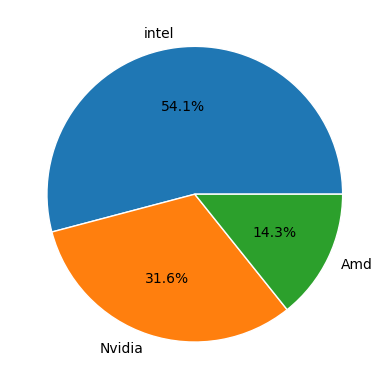

In [56]:
plt.pie(data['Gpu brand'].value_counts(),labels=['intel','Nvidia','Amd'],autopct='%1.1f%%',wedgeprops={'edgecolor':'white'})

/tmp/ipykernel_33/2681088610.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

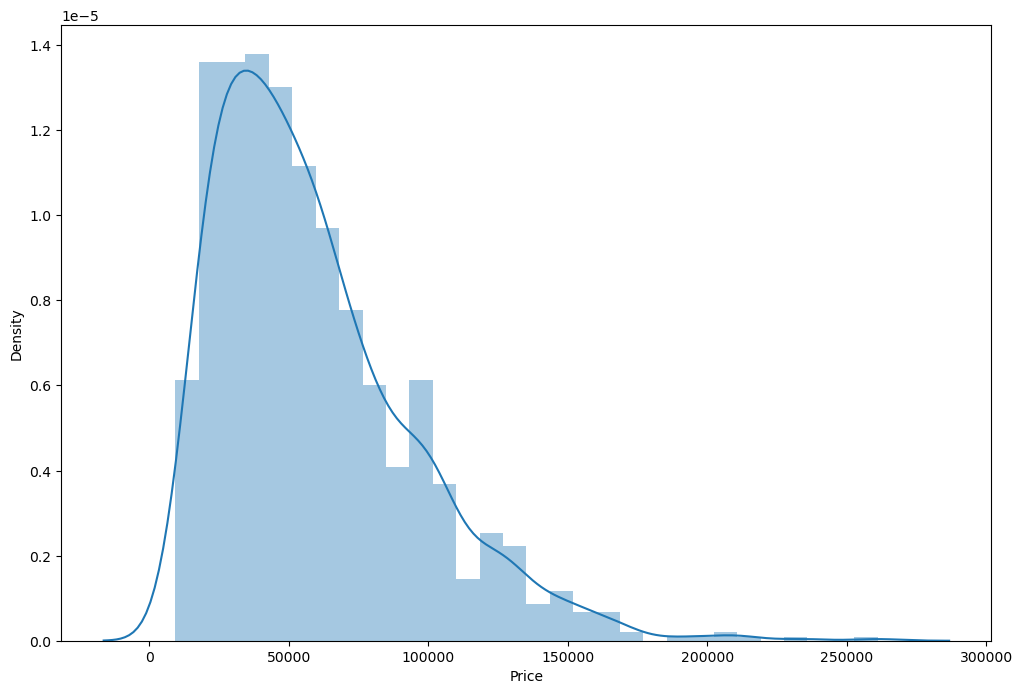

In [57]:
plt.figure(figsize=(12,8))
sns.distplot(data['Price'])

In [58]:
data.sample()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,cpu_name,cpu brand,memory type,memory_size,Gpu brand
475,Dell,Notebook,14.0,1366x768,Intel Core i3 6100U 2.3GHz,8,128GB SSD,Intel HD Graphics 520,Windows 10,1.79kg,39427.2,Intel Core i3,Intel Core i3,SSD,128,intel processor


**Drop un wanted colums**

In [59]:
data.drop(columns=['cpu_name','OpSys','Gpu','Cpu','ScreenResolution','Memory'],inplace=True)

In [60]:
data['Weight']=data['Weight'].apply(lambda x:x.replace('kg'," "))

In [61]:
data

,Company,TypeName,Inches,Ram,Weight,Price,cpu brand,memory type,memory_size,Gpu brand
0,Apple,Ultrabook,13.3,8,1.37,71378.6832,Intel Core i5,SSD,128,intel processor
1,Apple,Ultrabook,13.3,8,1.34,47895.5232,Intel Core i5,Flash,128,intel processor
2,HP,Notebook,15.6,8,1.86,30636.0000,Intel Core i5,SSD,256,intel processor
4,Apple,Ultrabook,13.3,8,1.37,96095.8080,Intel Core i5,SSD,256,intel processor
5,Acer,Notebook,15.6,4,2.1,21312.0000,AMD,HDD,500,Amd precosser
...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,1.8,33992.6400,Intel Core i7,SSD,128,intel processor
1299,Lenovo,2 in 1 Convertible,13.3,16,1.3,79866.7200,Intel Core i7,SSD,512,intel processor
1300,Lenovo,Notebook,14.0,2,1.5,12201.1200,intel processor,Flash,64,intel processor
1301,HP,Notebook,15.6,6,2.19,40705.9200,Intel Core i7,HDD,1,Amd precosser


# feauture scaling

In [62]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [63]:
data['Company']=encoder.fit_transform(data['Company'])
data['TypeName'] = encoder.fit_transform(data['TypeName'])
data['cpu brand'] = encoder.fit_transform(data['cpu brand'])
data['Gpu brand'] = encoder.fit_transform(data['Gpu brand'])
data['memory type'] = encoder.fit_transform(data['memory type'])


In [64]:
data

,Company,TypeName,Inches,Ram,Weight,Price,cpu brand,memory type,memory_size,Gpu brand
0,1,4,13.3,8,1.37,71378.6832,2,2,128,2
1,1,4,13.3,8,1.34,47895.5232,2,0,128,2
2,4,3,15.6,8,1.86,30636.0000,2,2,256,2
4,1,4,13.3,8,1.37,96095.8080,2,2,256,2
5,0,3,15.6,4,2.1,21312.0000,0,1,500,0
...,...,...,...,...,...,...,...,...,...,...
1298,5,0,14.0,4,1.8,33992.6400,3,2,128,2
1299,5,0,13.3,16,1.3,79866.7200,3,2,512,2
1300,5,3,14.0,2,1.5,12201.1200,4,0,64,2
1301,4,3,15.6,6,2.19,40705.9200,3,1,1,0


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 1302
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1227 non-null   int64  
 1   TypeName     1227 non-null   int64  
 2   Inches       1227 non-null   float64
 3   Ram          1227 non-null   int64  
 4   Weight       1227 non-null   object 
 5   Price        1227 non-null   float64
 6   cpu brand    1227 non-null   int64  
 7   memory type  1227 non-null   int64  
 8   memory_size  1227 non-null   object 
 9   Gpu brand    1227 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 105.4+ KB


In [66]:
data['Weight']=data['Weight'].astype(float)
data['memory_size']=data['memory_size'].astype(int)

ValueError: invalid literal for int() with base 10: '1.0'

In [67]:
data['memory_size'].unique()

array(['128', '256', '500', '512', '1', '32', '64', '2', '1.0', '16',
       '180', '240', '8', '508'], dtype=object)

In [68]:
data['memory_size']=data['memory_size'].replace('1.0',1)

In [69]:
data['memory_size'].unique()

array(['128', '256', '500', '512', '1', '32', '64', '2', 1, '16', '180',
       '240', '8', '508'], dtype=object)

In [70]:
data['Weight']=data['Weight'].astype(float)
data['memory_size']=data['memory_size'].astype(int)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 0 to 1302
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1227 non-null   int64  
 1   TypeName     1227 non-null   int64  
 2   Inches       1227 non-null   float64
 3   Ram          1227 non-null   int64  
 4   Weight       1227 non-null   float64
 5   Price        1227 non-null   float64
 6   cpu brand    1227 non-null   int64  
 7   memory type  1227 non-null   int64  
 8   memory_size  1227 non-null   int64  
 9   Gpu brand    1227 non-null   int64  
dtypes: float64(3), int64(7)
memory usage: 105.4 KB


## now all data numerical we can use ml

we do some visualziation

In [72]:
data.sample()

,Company,TypeName,Inches,Ram,Weight,Price,cpu brand,memory type,memory_size,Gpu brand
1239,5,3,13.3,16,1.4,79866.72,3,2,512,2


In [73]:
data.corr()

,Company,TypeName,Inches,Ram,Weight,Price,cpu brand,memory type,memory_size,Gpu brand
Company,1.000000,-0.017883,-0.018549,0.074183,-0.073384,0.180194,-0.007441,0.199139,0.122870,0.051387
TypeName,-0.017883,1.000000,-0.092225,-0.260230,-0.276615,-0.139597,-0.124773,-0.081296,0.053475,0.038500
Inches,-0.018549,-0.092225,1.000000,0.229875,0.820604,0.050599,-0.142482,0.038941,-0.115924,-0.504815
Ram,0.074183,-0.260230,0.229875,1.000000,0.387470,0.725647,0.247854,0.383771,0.159478,-0.162428
Weight,-0.073384,-0.276615,0.820604,0.387470,1.000000,0.214064,-0.010874,0.051595,-0.113115,-0.452467
Price,0.180194,-0.139597,0.050599,0.725647,0.214064,1.000000,0.276631,0.485815,0.280409,-0.010537
cpu brand,-0.007441,-0.124773,-0.142482,0.247854,-0.010874,0.276631,1.000000,-0.033270,0.052014,0.240307
memory type,0.199139,-0.081296,0.038941,0.383771,0.051595,0.485815,-0.033270,1.000000,0.268777,-0.076328
memory_size,0.122870,0.053475,-0.115924,0.159478,-0.113115,0.280409,0.052014,0.268777,1.000000,0.163965
Gpu brand,0.051387,0.038500,-0.504815,-0.162428,-0.452467,-0.010537,0.240307,-0.076328,0.163965,1.000000


<Axes: >

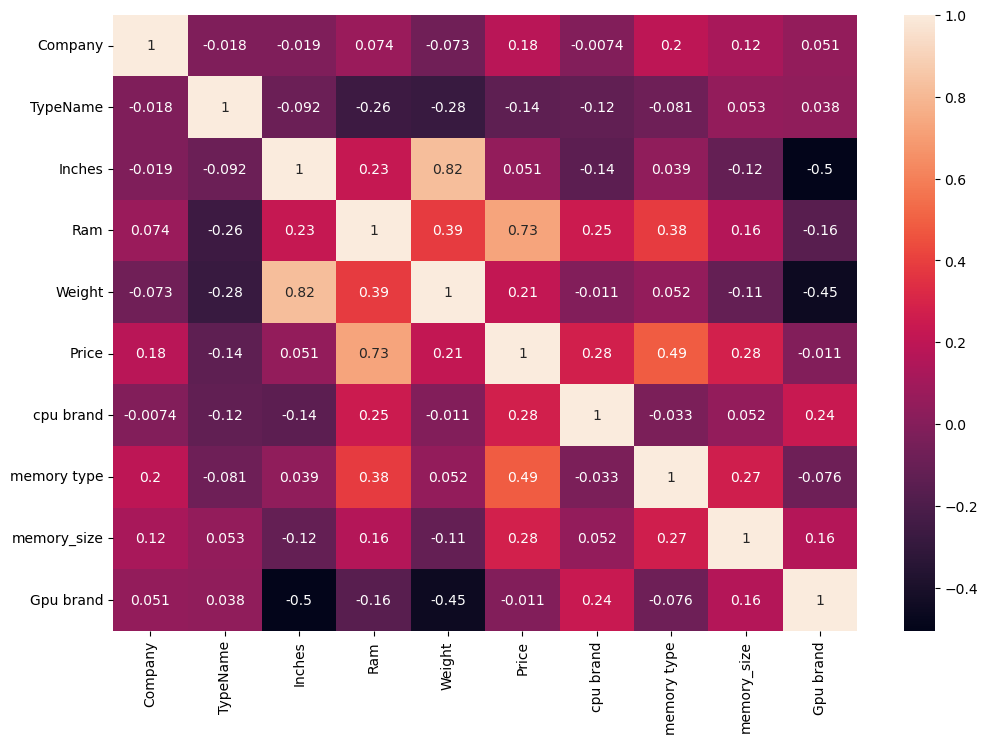

In [74]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

move depented variable as last column

In [75]:
column_to_move=data.pop('Price')

In [76]:
data.insert(len(data.columns) , 'Price', column_to_move)

In [77]:
data.sample()

,Company,TypeName,Inches,Ram,Weight,cpu brand,memory type,memory_size,Gpu brand,Price
1063,3,3,15.6,16,2.32,3,1,2,0,52746.6672


<Axes: >

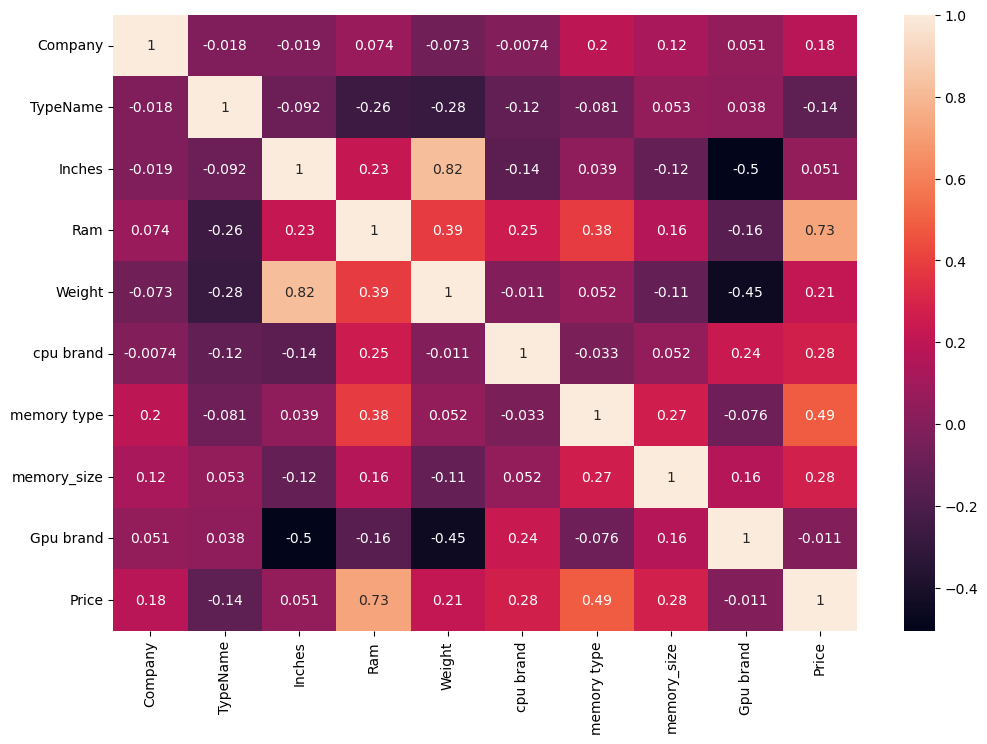

In [78]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

it's higher correlation between price and (Ram,inches,memory type)

Text(0, 0.5, 'price')

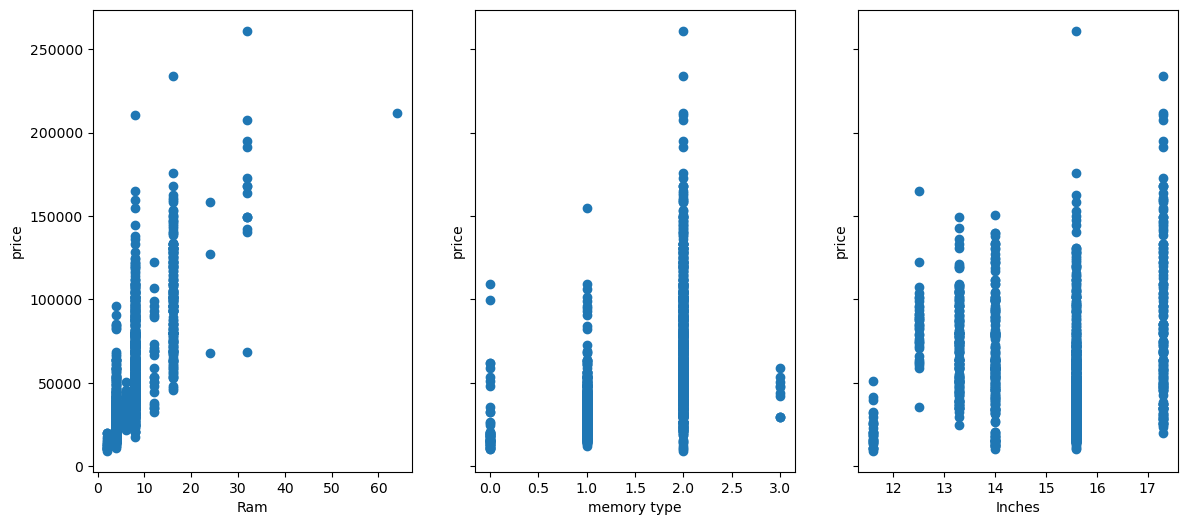

In [79]:
fig,axs=plt.subplots(1,3,sharey="row",figsize=(14,6))
axs[0].scatter(data=data,x='Ram',y='Price')
axs[0].set_xlabel('Ram')
axs[0].set_ylabel('price')
axs[1].scatter(data=data,x='memory type',y='Price')
axs[1].set_xlabel('memory type')
axs[1].set_ylabel('price')
axs[2].scatter(data=data,x='Inches',y='Price')
axs[2].set_xlabel('Inches')
axs[2].set_ylabel('price')


Text(0, 0.5, 'Price')

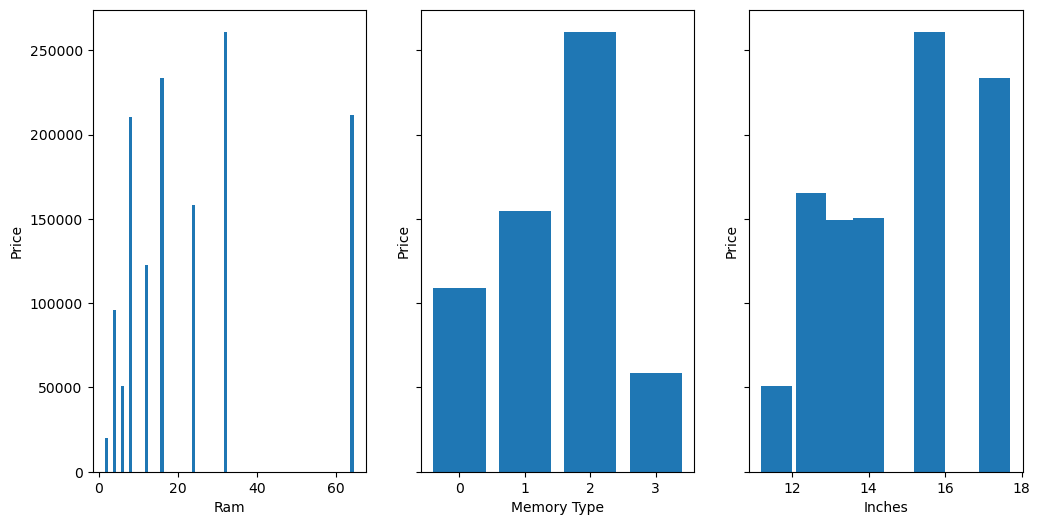

In [80]:


fig, axs = plt.subplots(1, 3, sharey="row", figsize=(12, 6))

axs[0].bar(x=data['Ram'], height=data['Price'])
axs[0].set_xlabel('Ram')
axs[0].set_ylabel('Price')

axs[1].bar(x=data['memory type'], height=data['Price'])
axs[1].set_xlabel('Memory Type')
axs[1].set_ylabel('Price')

axs[2].bar(x=data['Inches'], height=data['Price'])
axs[2].set_xlabel('Inches')
axs[2].set_ylabel('Price')


<Axes: xlabel='TypeName', ylabel='Price'>

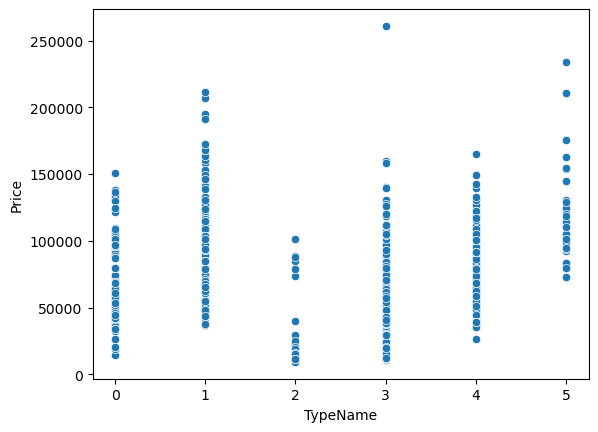

In [81]:
sns.scatterplot(data=data,x='TypeName',y='Price')

<BarContainer object of 1227 artists>

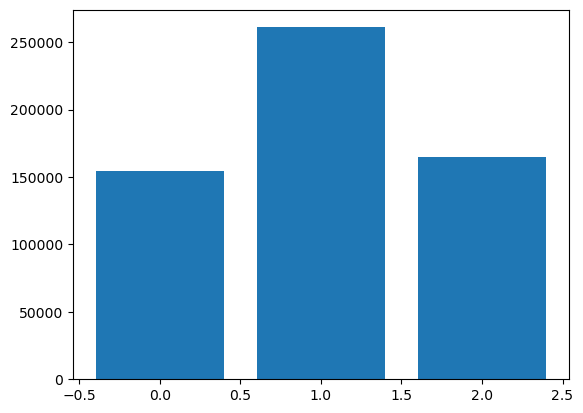

In [82]:
plt.bar(x=data['Gpu brand'], height=data['Price'])

in thise data i think it Impactful

In [83]:
data.drop(columns=['Gpu brand','TypeName'],inplace=True)

## now split the data into train and test

In [84]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [87]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(981, 7)
(246, 7)
(981,)
(246,)


In [88]:
from sklearn.linear_model import LinearRegression 

In [89]:
lr=LinearRegression()

In [90]:
lr.fit(x_train,y_train)

LinearRegression()

In [94]:
y_hat=lr.predict(x_test)

## check accuracy

In [95]:
print(lr.score(x_train,y_train)*100)

62.564942287369796


In [96]:
print(lr.score(x_test,y_test)*100)

60.59821088493283


In [100]:
list(zip(data.columns[1:],lr.coef_))

[('Inches', 2221.9729488804523),
 ('Ram', -3879.58792335773),
 ('Weight', 4113.484003053996),
 ('cpu brand', 7495.46149320526),
 ('memory type', 4607.984698686965),
 ('memory_size', 13098.118559775285),
 ('Price', 21.332548874920576)]

('Inches', 2221.9729488804523): The feature 'Inches' has a coefficient of 2221.9729488804523. This means that for every unit increase in the 'Inches' feature, the predicted price is expected to increase by approximately 2221.97 (keeping other features constant).

('Ram', -3879.58792335773): The feature 'Ram' has a coefficient of -3879.58792335773. This indicates that for every unit increase in the 'Ram' feature, the predicted price is expected to decrease by approximately 3879.59 (holding other features constant).

('Weight', 4113.484003053996): The feature 'Weight' has a coefficient of 4113.484003053996. This suggests that for every unit increase in the 'Weight' feature, the predicted price is expected to increase by approximately 4113.48 (keeping other features constant).

('cpu brand', 7495.46149320526): The feature 'cpu brand' has a coefficient of 7495.46149320526. This implies that having a different 'cpu brand' could affect the predicted price by approximately 7495.46 (holding other features constant).

('memory type', 4607.984698686965): The feature 'memory type' has a coefficient of 4607.984698686965. This indicates that the 'memory type' feature can impact the predicted price by approximately 4607.98 (keeping other features constant).

('memory_size', 13098.118559775285): The feature 'memory_size' has a coefficient of 13098.118559775285. This suggests that for every unit increase in the 'memory_size' feature, the predicted price is expected to increase by approximately 13098.12 (holding other features constant).

('Price', 21.332548874920576): The feature 'Price' represents the target variable, which is the price itself. The coefficient of 21.332548874920576 is associated with the intercept term of the linear regression model. It indicates the base value of the predicted price when all other features are zero

In [116]:
from sklearn.metrics import mean_absolute_error,explained_variance_score,r2_score
mean_absolute_error(y_test,y_hat)

15561.247315135402

In [122]:
explained_variance_score(y_test,y_hat)*100

# Explained variance score: 1 is perfect prediction


61.2273208142561

the mean error is much bigger and the variance is to small we will try another alog

In [123]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR

#### we can modifi function to train model in many algorithms

In [126]:
def select_model(m):
    model=m()
    model.fit(x_train,y_train)
    print(model.score(x_train,y_train)*100)
    print(model.score(x_test,y_test)*100)

#### KNeighborsRegressor

In [130]:
select_model(KNeighborsRegressor)

78.80589565360766
63.358733511704244


#### DecisionTreeRegressor

In [129]:
select_model(DecisionTreeRegressor)

98.74883524810299
63.06543381492516


#### RandomForestRegressor

In [131]:
select_model(RandomForestRegressor)

95.17562319046884
74.59280973608797
